<a href="https://colab.research.google.com/github/sumanthgubbala/Handwritten-Character-Recognition/blob/main/Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set up

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c emnistfhj-2024

 97% 264M/273M [00:01<00:00, 162MB/s]
100% 273M/273M [00:01<00:00, 145MB/s]


In [ ]:
from zipfile import ZipFile
dataset= '/content/emnistfhj-2024.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("extracted")

extracted


#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Load

In [ ]:
# Load train.csv
train_data = pd.read_csv('train.csv')

In [ ]:
# Check the first few rows of the train dataset
print(train_data.head())

        id_code  label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  \
0  train_035061    116        0        0        0        0        0        0   
1  train_680037    104        0        0        0        0        0        0   
2  train_746003     78        0        0        0        0        0        0   
3  train_024091     83        0        0        0        0        0        0   
4  train_648745     56        0        0        0        0        0        0   

   pixel_6  pixel_7  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0          0    

In [ ]:
train_data.columns

Index(['id_code', 'label', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3',
       'pixel_4', 'pixel_5', 'pixel_6', 'pixel_7',
       ...
       'pixel_774', 'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778',
       'pixel_779', 'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783'],
      dtype='object', length=786)

In [ ]:
# Separate labels and features
X_train = train_data.drop(columns=['id_code', 'label']).values
y_train = train_data['label'].values

In [ ]:
X_train.shape

(651404, 784)

In [ ]:
# reshaping
X_train = X_train.reshape(-1, 28, 28, 1)


In [ ]:
X_train.shape

(651404, 28, 28, 1)

In [ ]:
X_train = X_train/255

#Data visualization

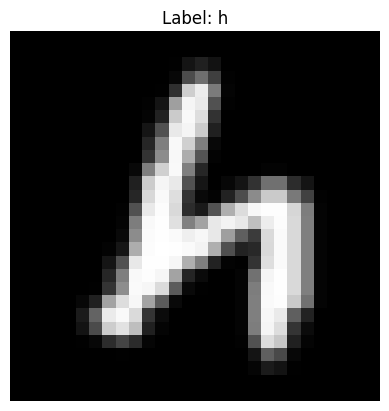

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first image
plt.imshow(X_train[1].reshape(28, 28), cmap='gray')
plt.title(f"Label: {chr(y_train[1])}")
plt.axis('off')
plt.show()


In [ ]:
# Load the test dataset
test_data = pd.read_csv("test.csv")

# Check the structure
print(test_data.head())


       id_code  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0  test_000000        0        0        0        0        0        0        0   
1  test_000001        0        0        0        0        0        0        0   
2  test_000002        0        0        0        0        0        0        0   
3  test_000003        0        0        0        0        0        0        0   
4  test_000004        0        0        0        0        0        0        0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0         

In [ ]:
test_data.columns

Index(['id_code', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4',
       'pixel_5', 'pixel_6', 'pixel_7', 'pixel_8',
       ...
       'pixel_774', 'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778',
       'pixel_779', 'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783'],
      dtype='object', length=785)

In [ ]:
test_data.shape

(162851, 785)

In [ ]:
X_test = test_data.iloc[:, 1:].values

In [ ]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Reshape
X_test = X_test.reshape(-1, 28, 28, 1)


In [ ]:
X_test.shape

(162851, 28, 28, 1)

In [ ]:
# normalize the pixels
X_test = X_test / 255  # 28x28 images, normalize to [0, 1]


In [ ]:
X_test

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='softmax')  # Output layer size should match the number of classes
])

In [ ]:
# Compile the model
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
16286/16286 [==============================] - 394s 24ms/step - loss: 0.4986 - accuracy: 0.8287 - val_loss: 0.4015 - val_accuracy: 0.8546
Epoch 2/5
16286/16286 [==============================] - 391s 24ms/step - loss: 0.3828 - accuracy: 0.8593 - val_loss: 0.3769 - val_accuracy: 0.8624
Epoch 3/5
16286/16286 [==============================] - 387s 24ms/step - loss: 0.3601 - accuracy: 0.8655 - val_loss: 0.3720 - val_accuracy: 0.8624
Epoch 4/5
16286/16286 [==============================] - 389s 24ms/step - loss: 0.3466 - accuracy: 0.8697 - val_loss: 0.3726 - val_accuracy: 0.8641
Epoch 5/5
16286/16286 [==============================] - 385s 24ms/step - loss: 0.3369 - accuracy: 0.8724 - val_loss: 0.3790 - val_accuracy: 0.8643


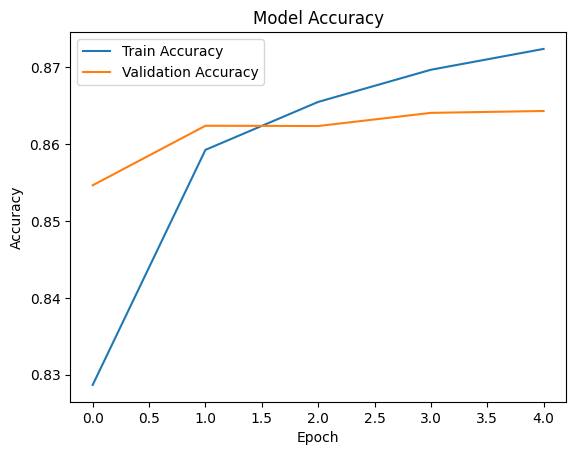

In [ ]:

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
predictions = model.predict(X_test)

5090/5090 [==============================] - 31s 6ms/step


In [ ]:
predictions

array([[2.2665738e-15, 1.5991871e-15, 5.0804422e-15, ..., 4.3406614e-15,
        2.1008253e-15, 2.4919288e-15],
       [3.5954008e-14, 9.1481049e-14, 1.4746837e-13, ..., 1.4605086e-13,
        8.9594334e-14, 7.8944365e-14],
       [5.1879617e-21, 1.1000232e-20, 1.2955657e-20, ..., 8.6504012e-21,
        1.7631778e-20, 1.2940839e-20],
       ...,
       [2.1118010e-19, 2.9544210e-20, 6.9219223e-20, ..., 4.2697790e-20,
        1.1207779e-19, 7.7933707e-20],
       [1.1692922e-11, 1.1555792e-11, 2.0819537e-11, ..., 1.4369954e-11,
        2.6446375e-11, 1.5840088e-11],
       [3.7475240e-10, 5.1683235e-10, 8.7608309e-10, ..., 8.1088142e-10,
        6.3389238e-10, 2.2452433e-10]], dtype=float32)

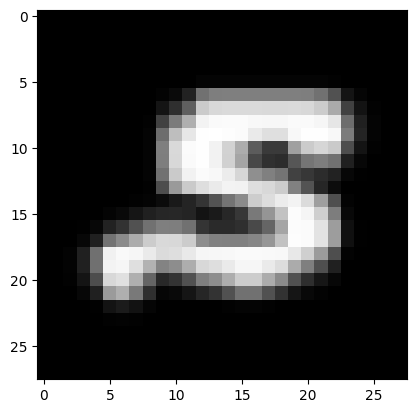

In [ ]:
# Plot the corresponding image
plt.imshow(X_test[1000].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
pred = np.argmax(predictions[1000])

In [ ]:
pred

83

In [ ]:
print(chr(pred))

S


# Bulid prediction System

In [ ]:
img = X_test[1001]

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
img = img.reshape(1,28,28,1)

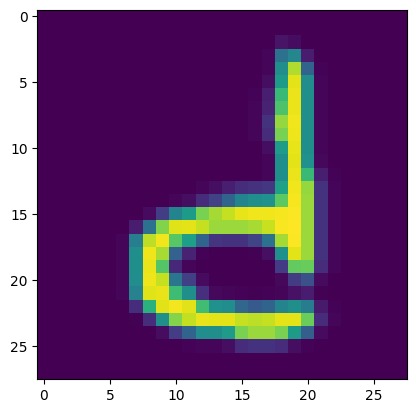

In [ ]:
plt.imshow(img.reshape(28,28))
plt.show()

In [ ]:
predicted_img = model.predict(img)

1/1 [==============================] - 0s 25ms/step


In [ ]:
predicted_img

array([[3.3147352e-18, 1.0494053e-18, 8.8571956e-19, 2.7371733e-18,
        3.4090150e-18, 1.8000468e-18, 1.9074756e-18, 1.5196123e-18,
        2.7361292e-18, 3.7027384e-18, 5.3531589e-18, 2.0775235e-18,
        9.6183983e-18, 3.5615949e-18, 1.6736601e-18, 1.6618523e-18,
        1.9603827e-18, 3.6156954e-18, 4.5710158e-18, 4.8947887e-18,
        3.4713751e-18, 3.0628467e-18, 3.6462787e-18, 2.8102403e-18,
        1.9249459e-18, 2.2530322e-18, 1.7762273e-18, 3.2242679e-18,
        5.1512648e-18, 3.7233327e-18, 5.9856555e-18, 5.5948884e-18,
        1.6022235e-17, 4.3022371e-18, 3.2969039e-18, 2.4282966e-18,
        3.4787192e-18, 2.8948716e-18, 6.6969713e-18, 1.5423538e-18,
        6.8001727e-19, 3.9470813e-18, 1.9323617e-18, 3.3016358e-18,
        2.3824919e-18, 5.1860845e-18, 2.1976696e-18, 8.7303289e-19,
        7.4821753e-11, 6.9951100e-11, 1.7415879e-07, 2.9495217e-09,
        3.6744274e-11, 5.0629053e-11, 2.6869252e-11, 5.4812006e-15,
        8.2628588e-07, 3.7073040e-14, 2.6351470e

In [ ]:
predicted_img = np.argmax(predicted_img)

In [ ]:
print("The predicted character is ",chr(predicted_img))

The predicted character is  d


In [ ]:
# Save the model (optional)
model.save('handwritten_character_recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
